# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [235]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [236]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [237]:
sinasc_raw['munResLat'].describe()

count    27027.000000
mean       -10.377988
std          1.372942
min        -13.499760
25%        -11.433870
50%        -10.435950
75%         -8.768890
max         -8.768890
Name: munResLat, dtype: float64

In [238]:
mun_lat = pd.qcut(sinasc_raw['munResLat'], 2).value_counts()
mun_lat

(-13.501, -10.436]    13874
(-10.436, -8.769]     13153
Name: munResLat, dtype: int64

In [239]:
#não sei o que houve, essa resposta estava aparecendo corretamente.
#veja que fiz igual nos outros 2 exercícios debaixo e deu certo.
#será que é algo no meu computador?

sinasc_raw.pivot_table(
    values=['LOCNASC', 'CONSULTAS'], 
    index = mun_lat, 
    aggfunc=['sum', 'mean', 'min', 'max', 'median', 'std']
)

munResLat


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [174]:
sinasc_raw['munResArea'].describe()

count    27027.000000
mean     14702.799767
std      13706.177751
min        459.978000
25%       3792.998000
50%       6896.648000
75%      34096.394000
max      34096.394000
Name: munResArea, dtype: float64

In [175]:
mun_area = pd.cut(sinasc_raw['munResArea'], [0, 3000, 34097]).value_counts()
mun_area

(3000, 34097]    21808
(0, 3000]         5219
Name: munResArea, dtype: int64

In [176]:
sinasc_raw.pivot_table(
    values=['LOCNASC', 'CONSULTAS'], 
    index = mun_area, 
    aggfunc=['sum', 'mean', 'min', 'max', 'median', 'std']
)

sum              mean                 min               max  \
           CONSULTAS LOCNASC CONSULTAS   LOCNASC CONSULTAS LOCNASC CONSULTAS   
munResArea                                                                     
5219.0         10745    3042  3.581667  1.014000         1       1         9   
21808.0        85914   24293  3.575727  1.011071         1       1         9   

                      median               std            
           LOCNASC CONSULTAS LOCNASC CONSULTAS   LOCNASC  
munResArea                                                
5219.0           4         4       1  0.694856  0.168761  
21808.0          4         4       1  0.799436  0.160777

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [177]:
sinasc_raw['munResAlt'].describe()

count    27027.000000
mean       179.111999
std        123.138365
min         85.000000
25%         87.000000
50%        153.000000
75%        191.000000
max        595.000000
Name: munResAlt, dtype: float64

In [178]:
mun_alt = pd.cut(sinasc_raw['munResAlt'], 4).value_counts()
mun_alt

(84.49, 212.5]    21269
(212.5, 340.0]     3800
(467.5, 595.0]     1590
(340.0, 467.5]      368
Name: munResAlt, dtype: int64

In [179]:
sinasc_raw.pivot_table(values=['LOCNASC', 'CONSULTAS'], index = mun_alt, aggfunc=['sum', 'mean', 'min', 'max', 'median', 'std'])

sum              mean                 min               max  \
          CONSULTAS LOCNASC CONSULTAS   LOCNASC CONSULTAS LOCNASC CONSULTAS   
munResAlt                                                                     
368.0           459     130  3.614173  1.023622         2       1         4   
1590.0          474     131  3.703125  1.023438         1       1         4   
3800.0          468     128  3.656250  1.000000         2       1         4   
21269.0         472     128  3.687500  1.000000         2       1         4   

                     median               std            
          LOCNASC CONSULTAS LOCNASC CONSULTAS   LOCNASC  
munResAlt                                                
368.0           4         4       1  0.617821  0.266207  
1590.0          2         4       1  0.579973  0.151883  
3800.0          1         4       1  0.567319  0.000000  
21269.0         1         4       1  0.557695  0.000000

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [194]:
sinasc_ex4 = sinasc_raw[['IDADEMAE', 'munResNome']]

In [195]:
sinasc_ex4.groupby('munResNome').sum()

,IDADEMAE
munResNome,
Alta Floresta D'Oeste,9539
Alto Alegre dos Parecis,3826
Alto Paraíso,5641
Alvorada D'Oeste,5283
Ariquemes,44276
Buritis,14901
Cabixi,2083
Cacaulândia,1916
Cacoal,36947


In [196]:
imediatas = {
"Candeias do Jamari": "Porto Velho", 
"Guajará-Mirim": "Porto Velho", 
"Itapuã do Oeste": "Porto Velho", 
"Nova Mamoré": "Porto Velho", 
"Porto Velho": "Porto Velho", 
"Alto Paraíso": "Ariquemes",
"Ariquemes": "Ariquemes",
"Buritis": "Ariquemes",
"Cacaulândia": "Ariquemes",
"Campo Novo de Rondônia": "Ariquemes",
"Cujubim": "Ariquemes",
"Monte Negro": "Ariquemes",
"Rio Crespo": "Ariquemes",
"Governador Jorge Teixeira": "Jaru",
"Jaru": "Jaru",
"Machadinho d'Oeste": "Jaru",
"Theobroma": "Jaru",
"Vale do Anari": "Jaru",
"Alvorada d'Oeste": "Ji-Paraná",
"Costa Marques": "Ji-Paraná",
"Ji-Paraná": "Ji-Paraná",
"Mirante da Serra": "Ji-Paraná",
"Nova União": "Ji-Paraná",
"Ouro Preto do Oeste": "Ji-Paraná",
"Presidente Médici": "Ji-Paraná",
"São Francisco do Guaporé": "Ji-Paraná",
"São Miguel do Guaporé": "Ji-Paraná",
"Seringueiras": "Ji-Paraná",
"Teixeirópolis": "Ji-Paraná",
"Urupá": "Ji-Paraná",
"Vale do Paraíso": "Ji-Paraná",
"Alta Floresta d'Oeste": "Cacoal",
"Alto Alegre dos Parecis": "Cacoal",
"Cacoal": "Cacoal",
"Castanheiras": "Cacoal",
"Espigão d'Oeste": "Cacoal",
"Ministro Andreazza": "Cacoal",
"Nova Brasilândia d'Oeste": "Cacoal",
"Novo Horizonte do Oeste": "Cacoal",
"Parecis": "Cacoal",
"Pimenta Bueno": "Cacoal",
"Primavera de Rondônia": "Cacoal",
"Rolim de Moura": "Cacoal",
"Santa Luzia d'Oeste": "Cacoal",
"São Felipe d'Oeste": "Cacoal",
"Cabixi": "Vilhena",
"Cerejeiras": "Vilhena",
"Chupinguaia": "Vilhena",
"Colorado do Oeste": "Vilhena",
"Corumbiara": "Vilhena",
"Pimenteiras do Oeste": "Vilhena",
"Vilhena": "Vilhena",
}

In [197]:
sinasc_ex4 = sinasc_ex4.set_index('munResNome')

In [199]:
sinasc_ex4.groupby(imediatas).mean()

,IDADEMAE
munResNome,
Ariquemes,25.459635
Cacoal,26.434757
Jaru,25.805579
Ji-Paraná,26.108682
Porto Velho,26.166303
Vilhena,26.417143


<AxesSubplot:xlabel='munResNome'>

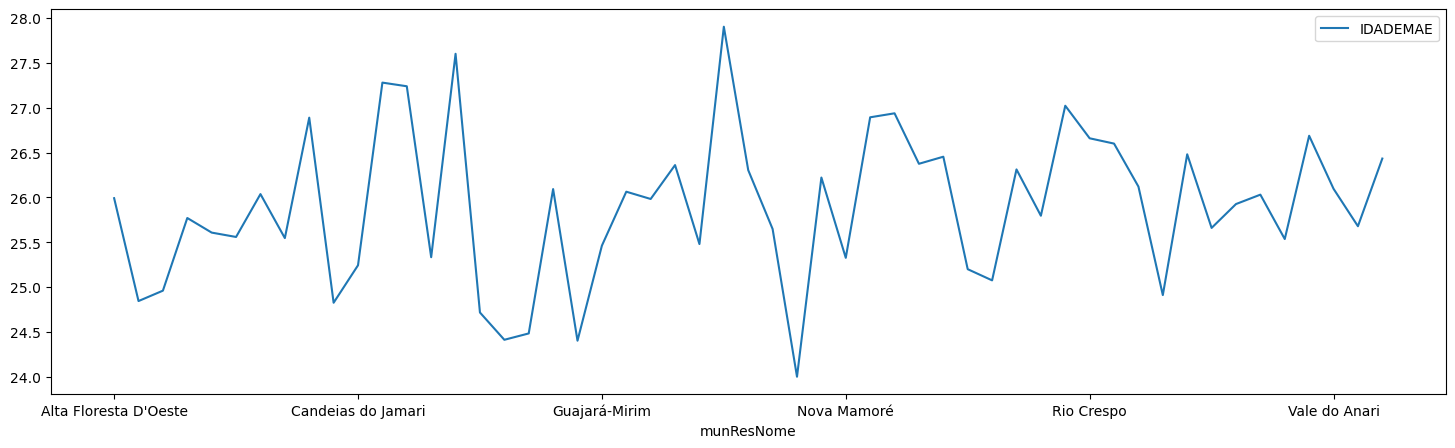

In [209]:
sinasc_ex4.pivot_table(values = 'IDADEMAE', index = 'munResNome', aggfunc = 'mean').plot(figsize=[18,5])

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [220]:
sinasc_ex5 = sinasc_raw[['IDADEMAE', 'munResNome']]
sinasc_ex5.groupby('munResNome').sum()

,IDADEMAE
munResNome,
Alta Floresta D'Oeste,9539
Alto Alegre dos Parecis,3826
Alto Paraíso,5641
Alvorada D'Oeste,5283
Ariquemes,44276
Buritis,14901
Cabixi,2083
Cacaulândia,1916
Cacoal,36947


In [221]:
idh = {
"Porto Velho": "IDH Alto",  
"Vilhena": "IDH Alto",
"Cacoal": "IDH Alto",
"Ji-Paraná": "IDH Alto",
"Pimenta Bueno": "IDH Alto",
"Ariquemes": "IDH Alto",
"Rolim de Moura": "IDH Alto",
"Cerejeiras": "IDH Médio",
"Jaru": "IDH Médio",
"Colorado do Oeste": "IDH Médio",
"Ouro Preto do Oeste": "IDH Médio",
"Espigão d'Oeste": "IDH Médio",
"Santa Luzia d'Oeste": "IDH Médio",
"Pimenteiras do Oeste": "IDH Médio",
"Presidente Médici": "IDH Médio",
"Castanheiras": "IDH Médio",
"Guajará-Mirim": "IDH Médio",
"Chupinguaia": "IDH Médio",
"Cabixi": "IDH Médio",
"Candeias do Jamari": "IDH Médio",
"São Felipe d'Oeste": "IDH Médio",
"Cacaulândia": "IDH Médio",
"São Miguel do Guaporé": "IDH Médio",
"Mirante da Serra": "IDH Médio",
"Alvorada d'Oeste": "IDH Médio",
"Teixeirópolis": "IDH Médio",
"Nova Brasilândia d'Oeste": "IDH Médio",
"Rio Crespo": "IDH Médio",
"Primavera de Rondônia": "IDH Médio",
"Alta Floresta d'Oeste": "IDH Médio",
"Ministro Andreazza": "IDH Médio",
"Novo Horizonte do Oeste": "IDH Médio",
"Vale do Paraíso": "IDH Médio",
"Alto Paraíso": "IDH Médio",
"Parecis": "IDH Médio",
"Buritis": "IDH Médio",
"Itapuã do Oeste": "IDH Médio",
"Corumbiara": "IDH Médio",
"Cujubim": "IDH Médio",
"Costa Marques": "IDH Médio",
"São Francisco do Guaporé": "IDH Médio",
"Urupá": "IDH Médio",
"Monte Negro": "IDH Médio",
"Seringueiras": "IDH Baixo",
"Governador Jorge Teixeira": "IDH Baixo",
"Machadinho d'Oeste": "IDH Baixo",
"Campo Novo de Rondônia": "IDH Baixo",
"Alto Alegre dos Parecis": "IDH Baixo",
"Theobroma": "IDH Baixo",
"Nova União": "IDH Baixo",
"Nova Mamoré": "IDH Baixo",
"Vale do Anari": "IDH Baixo",
}

In [222]:
sinasc_ex5 = sinasc_ex5.set_index('munResNome')

In [223]:
sinasc_ex5.groupby(idh).mean()

,IDADEMAE
munResNome,
IDH Alto,26.280332
IDH Baixo,25.269231
IDH Médio,25.848191


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [224]:
sinasc_ex52 = sinasc_raw[['IDADEMAE', 'munResNome']]

In [225]:
sinasc_ex52.groupby('munResNome').sum()

,IDADEMAE
munResNome,
Alta Floresta D'Oeste,9539
Alto Alegre dos Parecis,3826
Alto Paraíso,5641
Alvorada D'Oeste,5283
Ariquemes,44276
Buritis,14901
Cabixi,2083
Cacaulândia,1916
Cacoal,36947


In [226]:
ifdm = {
"Ariquemes": "IFDM Moderado",
"Vilhena": "IFDM Moderado",
"Pimenta Bueno": "IFDM Moderado",
"Porto Velho": "IFDM Moderado",
"Ji-Paraná": "IFDM Moderado",
"Cacoal": "IFDM Moderado",
"Santa Luzia d'Oeste": "IFDM Moderado",
"Rolim de Moura": "IFDM Moderado",
"Chupinguaia": "IFDM Moderado",
"São Miguel do Guaporé": "IFDM Moderado",
"Pimenteiras do Oeste": "IFDM Moderado",
"Teixeirópolis": "IFDM Moderado",
"Colorado do Oeste": "IFDM Moderado",
"Jaru": "IFDM Moderado",
"Rio Crespo": "IFDM Moderado",
"Primavera de Rondônia": "IFDM Moderado",
"Alta Floresta d'Oeste": "IFDM Moderado",
"Ouro Preto do Oeste": "IFDM Moderado",
"São Francisco do Guaporé": "IFDM Moderado",
"Candeias do Jamari": "IFDM Moderado",
"Buritis": "IFDM Moderado",
"São Felipe d'Oeste": "IFDM Moderado",
"Presidente Médici": "IFDM Moderado",
"Cerejeiras": "IFDM Moderado",
"Monte Negro": "IFDM Moderado",
"Urupá": "IFDM Moderado",
"Espigão d'Oeste": "IFDM Regular",
"Seringueiras": "IFDM Regular",
"Alvorada d'Oeste": "IFDM Regular",
"Itapuã do Oeste": "IFDM Regular",
"Cabixi": "IFDM Regular",
"Novo Horizonte do Oeste": "IFDM Regular",
"Nova Brasilândia d'Oeste": "IFDM Regular",
"Vale do Paraíso": "IFDM Regular",
"Corumbiara": "IFDM Regular",
"Alto Paraíso": "IFDM Regular",
"Cacaulândia": "IFDM Regular",
"Vale do Anari": "IFDM Regular",
"Ministro Andreazza": "IFDM Regular",
"Costa Marques": "IFDM Regular",
"Nova União": "IFDM Regular",
"Guajará-Mirim": "IFDM Regular",
"Mirante da Serra": "IFDM Regular",
"Parecis": "IFDM Regular",
"Castanheiras": "IFDM Regular",
"Theobroma": "IFDM Regular",
"Machadinho d'Oeste": "IFDM Regular",
"Campo Novo de Rondônia": "IFDM Regular",
"Nova Mamoré": "IFDM Regular",
"Cujubim": "IFDM Regular",
"Alto Alegre dos Parecis": "IFDM Regular",
"Governador Jorge Teixeira": "IFDM Regular",
}

In [227]:
sinasc_ex52 = sinasc_ex52.set_index('munResNome')

In [228]:
sinasc_ex52.groupby(ifdm).mean()

,IDADEMAE
munResNome,
IFDM Moderado,26.226921
IFDM Regular,25.412005


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [229]:
sinasc_ex53 = sinasc_raw[['IDADEMAE', 'munResNome']]

In [230]:
sinasc_ex53.groupby('munResNome').sum()

,IDADEMAE
munResNome,
Alta Floresta D'Oeste,9539
Alto Alegre dos Parecis,3826
Alto Paraíso,5641
Alvorada D'Oeste,5283
Ariquemes,44276
Buritis,14901
Cabixi,2083
Cacaulândia,1916
Cacoal,36947


In [231]:
pib = {
"Porto Velho": "Acima de 1 Bilhão",
"Ji-Paraná": "Acima de 1 Bilhão",
"Vilhena": "Acima de 1 Bilhão",
"Ariquemes": "Acima de 1 Bilhão",
"Cacoal": "Acima de 1 Bilhão",
"Jaru": "Acima de 1 Bilhão",
"Rolim de Moura": "Acima de 1 Bilhão",
"Pimenta Bueno": "Acima de 1 Bilhão",
"Guajará-Mirim": "Acima de 500 Milhões",
"Ouro Preto do Oeste": "Acima de 500 Milhões",
"Buritis": "Acima de 500 Milhões",
"Machadinho do Oeste": "Acima de 500 Milhões",
"Espigão d'Oeste": "Acima de 500 Milhões",
"São Miguel do Guaporé": "Acima de 500 Milhões",
"Candeias do Jamari": "Acima de 500 Milhões",
"Nova Mamoré": "Acima de 500 Milhões",
"Cerejeiras": "Acima de 500 Milhões",
"Alta Floresta do Oeste": "Acima de 300 Milhões",
"Presidente Médici": "Acima de 300 Milhões",
"Cujubim": "Acima de 300 Milhões",
"Nova Brasilândia do Oeste": "Acima de 300 Milhões",
"Alto Paraíso": "Acima de 300 Milhões",
"São Francisco do Guaporé": "Acima de 300 Milhões",
"Colorado do Oeste": "Acima de 300 Milhões",
"Monte Negro": "Acima de 200 Milhões",
"Alto Alegre dos Parecis": "Acima de 200 Milhões",
"Campo Novo de Rondônia": "Acima de 200 Milhões",
"Alvorada do Oeste": "Acima de 200 Milhões",
"Chupinguaia": "Acima de 100 Milhões",
"Corumbiara": "Acima de 100 Milhões",
"Ministro Andreazza": "Acima de 100 Milhões",
"Urupá": "Acima de 100 Milhões",
"Costa Marques": "Acima de 100 Milhões",
"Seringueiras": "Acima de 100 Milhões",
"Mirante da Serra": "Acima de 100 Milhões",
"Governador Jorge Teixeira": "Acima de 100 Milhões",
"Theobroma": "Acima de 100 Milhões",
"Santa Luzia do Oeste": "Acima de 100 Milhões",
"Novo Horizonte do Oeste": "Acima de 100 Milhões",
"Itapuã do Oeste": "Acima de 100 Milhões",
"Vale do Paraíso": "Acima de 100 Milhões",
"Cacaulândia": "Acima de 100 Milhões",
"Cabixi": "Acima de 100 Milhões",
"Vale do Anari": "Acima de 100 Milhões",
"Nova União": "Até 100 Milhões",
"Parecis": "Até 100 Milhões",
"Rio Crespo": "Até 100 Milhões",
"Pimenteiras do Oeste": "Até 100 Milhões",
"Teixeirópolis": "Até 100 Milhões",
"São Felipe do Oeste": "Até 100 Milhões",
"Castanheiras": "Até 100 Milhões",
"Primavera de Rondônia": "Até 100 Milhões",
}

In [232]:
sinasc_ex53 = sinasc_ex53.set_index('munResNome')

In [233]:
sinasc_ex53.groupby(pib).mean()

,IDADEMAE
munResNome,
Acima de 1 Bilhão,26.265562
Acima de 100 Milhões,25.638424
Acima de 200 Milhões,25.146435
Acima de 300 Milhões,25.706070
Acima de 500 Milhões,25.785927
Até 100 Milhões,26.519894


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Infelizmente o nosso estudo nessa tarefa não trouxe alguma resposta.
Mesmo com esse estudo feito, com o IDM, PIB, etc.
Percebemos que a idade média das mães não altera, fica sempre entre 25 e 26 anos em média, independente da variável que usamos.